# Homework 1: Preprocessing and Text Classification

Student Name: Chien-Lin Chen

Student ID: 900380

# General Info

<b>Due date</b>: Sunday, 5 Apr 2020 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -20% per day (both week and weekend days counted)

<b>Marks</b>: 10% of mark for class (with 9% on correctness + 1% on quality and efficiency of your code)

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/17601/pages/using-jupyter-notebook-and-python?module_item_id=1678430) on Canvas (under Modules>Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. In particular, if you are not using a lab computer which already has it installed, we recommend installing all the data for NLTK, since you will need various parts of it to complete this assignment. You can also use any Python built-in packages, but do not use any other 3rd party packages (the packages listed above are all fine to use); if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

To familiarize yourself with NLTK, here is a free online book:  Steven Bird, Ewan Klein, and Edward Loper (2009). <a href=http://nltk.org/book>Natural Language Processing with Python</a>. O'Reilly Media Inc. You may also consult the <a href=https://www.nltk.org/api/nltk.html>NLTK API</a>.

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board; we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

# Overview

In this homework, you'll be working with a collection tweets. The task is to classify whether a tweet constitutes a rumour event. This homework involves writing code to preprocess data and perform text classification.

# 1. Preprocessing (5 marks)

**Instructions**: Run the code below to download the tweet corpus for the assignment. Note: the download may take some time. **No implementation is needed.**

In [208]:
import requests
import os
from pathlib import Path

fname = 'rumour-data.tgz'
data_dir = os.path.splitext(fname)[0] #'rumour-data'

my_file = Path(fname)
if not my_file.is_file():
    url = "https://github.com/jhlau/jhlau.github.io/blob/master/files/rumour-data.tgz?raw=true"
    r = requests.get(url)

    #Save to the current directory
    with open(fname, 'wb') as f:
        f.write(r.content)
        
print("Done. File downloaded:", my_file)


Done. File downloaded: rumour-data.tgz


**Instructions**: Run the code to extract the zip file. Note: the extraction may take a minute or two. **No implementation is needed.**

In [209]:
import tarfile

#decompress rumour-data.tgz
tar = tarfile.open(fname, "r:gz")
tar.extractall()
tar.close()

#remove superfluous files (e.g. .DS_store)
extra_files = []
for r, d, f in os.walk(data_dir):
    for file in f:
        if (file.startswith(".")):
            extra_files.append(os.path.join(r, file))
for f in extra_files:
    os.remove(f)

print("Extraction done.")

Extraction done.


### Question 1 (1.0 mark)

**Instructions**: The corpus data is in the *rumour-data* folder. It contains 2 sub-folders: *non-rumours* and *rumours*. As the names suggest, *rumours* contains all rumour-propagating tweets, while *non-rumours* has normal tweets. Within  *rumours* and *non-rumours*, you'll find some sub-folders, each named with an ID. Each of these IDs constitutes an 'event', where an event is defined as consisting a **source tweet** and its **reactions**.

An illustration of the folder structure is given below:

    rumour-data
        - rumours
            - 498254340310966273
                - reactions
                    - 498254340310966273.json
                    - 498260814487642112.json
                - source-tweet
                    - 498254340310966273.json
        - non-rumours

Now we need to gather the tweet messages for rumours and non-rumour events. As the individual tweets are stored in json format, we need to use a json parser to parse and collect the actual tweet message. The function `get_tweet_text_from_json(file_path)` is provided to do that.

**Task**: Complete the `get_events(event_dir)` function. The function should return **a list of events** for a particular class of tweets (e.g. rumours), and each event should contain the source tweet message and all reaction tweet messages.

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [210]:
import json

def get_tweet_text_from_json(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
        return data["text"]
    
def get_events(event_dir):
    
    event_list = []
    
    for event in sorted(os.listdir(event_dir)):
        
        a_event = {}
        
        source_tweet = get_tweet_text_from_json(event_dir + "/" + event + "/source-tweet/"+ event + ".json")

        reactions = []
        
        # files in a event reactions
        reactions_list = os.listdir(event_dir + "/"  + event + "/reactions")
        
        for i in range(len(reactions_list)):
            reactions.append(get_tweet_text_from_json(event_dir + "/" + event + "/reactions/"+ reactions_list[i]))
        
        a_event[source_tweet] = reactions

        event_list.append(a_event)
    
    return event_list
    
#a list of events, and each event is a list of tweets (source tweet + reactions)    
rumour_events = get_events(os.path.join(data_dir, "rumours"))
nonrumour_events = get_events(os.path.join(data_dir, "non-rumours"))

print("Number of rumour events =", len(rumour_events))
print("Number of non-rumour events =", len(nonrumour_events))

Number of rumour events = 500
Number of non-rumour events = 1000


**For your testing:**

In [211]:
assert(len(rumour_events) == 500)
assert(len(nonrumour_events) == 1000)

### Question 2 (1.0 mark)

**Instructions**: Next we need to preprocess the collected tweets to create a bag-of-words representation. The preprocessing steps required here are: (1) tokenize each tweet into individual word tokens (using NLTK `TweetTokenizer`); and (2) remove stopwords (based on NLTK `stopwords`).

**Task**: Complete the `preprocess_events(event)` function. The function takes **a list of events** as input, and returns **a list of preprocessed events**. Each preprocessed event should have a dictionary of words and frequencies.

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [212]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from collections import defaultdict

tt = TweetTokenizer()
stopwords = set(stopwords.words('english'))

def preprocess_events(events):

    preprocessed_event_list = []
    
    for i in range(len(events)):
        
        word_tokens = {}
        
        for source, reactions in events[i].items():
            
            source_tokens = tt.tokenize(source)
            
            # filter the stop words
            source_tokens_filtered = [w for w in source_tokens if not w in stopwords]
            
            # frequency for a word token in the source
            for s_word in source_tokens_filtered:
                if s_word in word_tokens:
                    word_tokens[s_word] += 1
                else:
                    word_tokens[s_word] = 1

            # for each reaction belong to the same source
            for reaction in reactions:
                
                reaction_tokens = tt.tokenize(reaction)
                
                # filter the stop words
                reaction_tokens_filtered = [w for w in reaction_tokens if not w in stopwords]
                
                # frequency for a word token in the reactions
                for r_word in reaction_tokens_filtered:
                    if r_word in word_tokens:
                        word_tokens[r_word] += 1
                    else:
                        word_tokens[r_word] = 1
                
            preprocessed_event_list.append(word_tokens)
    
    return preprocessed_event_list

preprocessed_rumour_events = preprocess_events(rumour_events)
preprocessed_nonrumour_events = preprocess_events(nonrumour_events)

print("Number of preprocessed rumour events =", len(preprocessed_rumour_events))
print("Number of preprocessed non-rumour events =", len(preprocessed_nonrumour_events))

Number of preprocessed rumour events = 500
Number of preprocessed non-rumour events = 1000


**For your testing**:

In [213]:
assert(len(preprocessed_rumour_events) == 500)
assert(len(preprocessed_nonrumour_events) == 1000)

**Instructions**: Hashtags (i.e. topic tags which start with #) pose an interesting tokenisation problem because they often include multiple words written without spaces or capitalization. Run the code below to collect all unique hashtags in the preprocessed data. **No implementation is needed.**



In [214]:
def get_all_hashtags(events):
    hashtags = set([])
    for event in events:
        for word, frequency in event.items():
            if word.startswith("#"):
                hashtags.add(word)
    return hashtags

hashtags = get_all_hashtags(preprocessed_rumour_events + preprocessed_nonrumour_events)
print("Number of hashtags =", len(hashtags))

Number of hashtags = 1829


### Question 3 (2.0 mark)

**Instructions**: Our task here to tokenize the hashtags, by implementing a reversed version of the MaxMatch algorithm discussed in class, where matching begins at the end of the hashtag and progresses backwards. NLTK has a list of words that you can use for matching, see starter code below. Be careful about efficiency with respect to doing word lookups. One extra challenge you have to deal with is that the provided list of words includes only lemmas: your MaxMatch algorithm should match inflected forms by converting them into lemmas using the NLTK lemmatizer before matching. When lemmatising a word, you also need to provide the part-of-speech tag of the word. You should use `nltk.tag.pos_tag` for doing part-of-speech tagging.

Note that the list of words is incomplete, and, if you are unable to make any longer match, your code should default to matching a single letter. Create a new list of tokenized hashtags (this should be a list of lists of strings) and use slicing to print out the last 20 hashtags in the list.

For example, given "#speakup", the algorithm should produce: \["#", "speak", "up"\]. And note that you do not need to delete the hashtag symbol ("#") from the tokenised outputs.

**Task**: Complete the `tokenize_hashtags(hashtags)` function by implementing a reversed MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of word tokens".

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [215]:
from nltk.corpus import wordnet

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
words = set(nltk.corpus.words.words()) #a list of words provided by NLTK

In [216]:
def lemmatize(hashtag):
    
    pos_tag = nltk.tag.pos_tag([hashtag])[0][1]
    
    if pos_tag == "NN" or pos_tag == "NNS" or pos_tag == "NNP" or pos_tag == "NNPS":
        return lemmatizer.lemmatize(hashtag,'n')
    
    elif pos_tag == "JJS" or pos_tag == "JJR" or pos_tag == "JJS":
        return lemmatizer.lemmatize(hashtag,'a')
    
    elif pos_tag == "RB" or pos_tag == "RBR" or pos_tag == "RBS":
        return lemmatizer.lemmatize(hashtag,'r')
    
    elif pos_tag == "VB" or pos_tag == "VBD" or pos_tag == "VBG" or pos_tag == "VBN" or \
         pos_tag == "VBP" or pos_tag == "VBZ":
        return lemmatizer.lemmatize(hashtag,'v')
    
    else:
        return hashtag

In [217]:
def reverse_maxmatch(hashtag, dictionary, hashtag_length):
    
    index = hashtag_length
    
    hashtag_tokens = []
    
    while index > 0:
        
        token = None
        
        # get the hashtag subword by starting at the end of a string
        # search for the possible longest subword in the dictionary
        for i in range(hashtag_length, 0, -1):
            
            
            if index - i < 0:
                continue
                
            else:
                subword = hashtag[index - i: index]
            
                # found a subword that is in dictionary
                if subword in dictionary:
                    token = subword
                    hashtag_tokens.append(token)
                    index -= i
                    break
                    
                # try lemmatize the subword and find in the dictionary
                subword_lemma = lemmatize(subword)
                if subword_lemma in dictionary:
                    token = subword_lemma
                    hashtag_tokens.append(token)
                    index -= i
                    break
                       
        # cannot find the last character 
        if token is None:
            hashtag_tokens.append(hashtag[index - 1])
            index -= 1
            
    # reverse the tokens found
    return hashtag_tokens[::-1]

In [218]:
def tokenize_hashtags(hashtags):

    hashtags_dic = {}
    
    for hashtag in hashtags:
        
        hashtag_tokens = reverse_maxmatch(hashtag, words, len(hashtag))

        hashtags_dic[hashtag] = hashtag_tokens

    return hashtags_dic

tokenized_hashtags = tokenize_hashtags(hashtags)
print(list(tokenized_hashtags.items())[:20])

[('#Barbarism', ['#', 'B', 'ar', 'bar', 'ism']), ('#AttackInOttawa', ['#', 'A', 't', 'tack', 'I', 'n', 'Ottawa']), ('#corruption', ['#', 'corruption']), ('#pedantry', ['#', 'pedantry']), ('#LoveForCanada', ['#', 'Lo', 'v', 'e', 'For', 'Canada']), ('#redblacks', ['#', 'red', 'black']), ('#PrayForFerguson', ['#', 'P', 'ray', 'For', 'Ferguson']), ('#KeyStoner', ['#', 'K', 'ey', 'S', 'toner']), ('#FreeSpeech', ['#', 'F', 'ree', 'S', 'pee', 'c', 'h']), ('#foxnewsunday', ['#', 'fox', 'new', 'sun', 'day']), ('#myNYPD', ['#', 'my', 'N', 'Y', 'P', 'D']), ('#world', ['#', 'world']), ('#foolsnotmartyrs', ['#', 'fool', 'snot', 'martyr']), ('#PRAY', ['#', 'P', 'R', 'A', 'Y']), ('#pilots', ['#', 'pilot']), ('#SayNoToIslamophobia', ['#', 'S', 'ay', 'No', 'T', 'o', 'I', 'sla', 'moph', 'obi', 'a']), ('#runtelldat', ['#', 'r', 'untell', 'd', 'at']), ('#naive', ['#', 'naive']), ('#TenNews', ['#', 'T', 'en', 'N', 'e', 'w']), ('#LiarsLie', ['#', 'L', 'i', 'ar', 'L', 'ie'])]


**For your testing:**

In [219]:
assert(len(tokenized_hashtags) == len(hashtags))

### Question 4 (1.0 mark)

**Instructions**: Now that we have the tokenized hashtags, we need to go back and update the bag-of-words representation for each event.

**Task**: Complete the ``update_event_bow(events)`` function. The function takes **a list of preprocessed events**, and for each event, it looks for every hashtag it has and updates the bag-of-words dictionary with the tokenized hashtag tokens. Note: you do not need to delete the counts of the original hashtags when updating the bag-of-words (e.g., if a document has "#speakup":2 in its bag-of-words representation, you do not need to delete this hashtag and its counts).

In [220]:
def update_event_bow(events):
    
    for event in events:

        a_event_hashtags = {}
        
        for word, freq in event.items():
            
            if word[0] == "#" and len(word) != 1:
                a_event_hashtags[word] = freq
        
        for hashtag, hashtag_freq in a_event_hashtags.items():
            
            hashtag_tokens = reverse_maxmatch(hashtag, words, len(hashtag))

            # update the frequency of the word tokens from the hashtag tokens
            for token in hashtag_tokens:
                
                if token in event:
                    event[token] += hashtag_freq
                else:
                    event[token] = hashtag_freq    
            
update_event_bow(preprocessed_rumour_events)
update_event_bow(preprocessed_nonrumour_events)

print("Number of preprocessed rumour events =", len(preprocessed_rumour_events))
print("Number of preprocessed non-rumour events =", len(preprocessed_nonrumour_events))

Number of preprocessed rumour events = 500
Number of preprocessed non-rumour events = 1000


# Text Classification (4 marks)

### Question 5 (1.0 mark)

**Instructions**: Here we are interested to do text classification, to predict, given a tweet and its reactions, whether it is a rumour or not. The task here is to create training, development and test partitions from the preprocessed events and convert the bag-of-words representation into feature vectors.

**Task**: Using scikit-learn, create training, development and test partitions with a 60%/20%/20% ratio. Remember to preserve the ratio of rumour/non-rumour events for all your partitions. Next, turn the bag-of-words dictionary of each event into a feature vector, using scikit-learn `DictVectorizer`.

In [221]:
from sklearn.model_selection import train_test_split

rumor_train, rumor_dev_test = train_test_split(preprocessed_rumour_events, train_size = 0.6)
rumor_dev, rumor_test = train_test_split(rumor_dev_test, train_size = 0.5)
rumor_train_category = ["rumor" for i in range(len(rumor_train))]
rumor_dev_category = ["rumor" for i in range(len(rumor_dev))]
rumor_test_category = ["rumor" for i in range(len(rumor_test))]

nonrumor_train, nonrumor_dev_test = train_test_split(preprocessed_nonrumour_events, train_size = 0.6)
nonrumor_dev, nonrumor_test = train_test_split(nonrumor_dev_test, train_size = 0.5)
nonrumor_train_category = ["nonrumor" for i in range(len(nonrumor_train))]
nonrumor_dev_category = ["nonrumor" for i in range(len(nonrumor_dev))]
nonrumor_test_category = ["nonrumor" for i in range(len(nonrumor_test))]

/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [222]:
X_train = rumor_train + nonrumor_train
y_train = rumor_train_category + nonrumor_train_category

X_dev = rumor_dev + nonrumor_dev
y_dev = rumor_dev_category + nonrumor_dev_category

X_test = rumor_test + nonrumor_test
y_test = rumor_test_category + nonrumor_test_category

In [223]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()

training_data = vectorizer.fit_transform(X_train)

development_data = vectorizer.transform(X_dev)

test_data = vectorizer.transform(X_test)

print("Vocabulary size =", len(vectorizer.vocabulary_))

Vocabulary size = 27090


### Question 6 (2.0 mark)

**Instructions**: Now, let's build some classifiers. Here, we'll be comparing Naive Bayes and Logistic Regression. For each, you need to first find a good value for their main regularisation (hyper)parameters, which you should identify using the scikit-learn docs or other resources. Use the development set you created for this tuning process; do **not** use cross-validation in the training set, or involve the test set in any way. You don't need to show all your work, but you do need to print out the accuracy with enough different settings to strongly suggest you have found an optimal or near-optimal choice. We should not need to look at your code to interpret the output.

**Task**: Implement two text classifiers: Naive Bayes and Logistic Regression. Tune the hyper-parameters of these classifiers and print the task performance for different hyper-parameter settings.

In [224]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

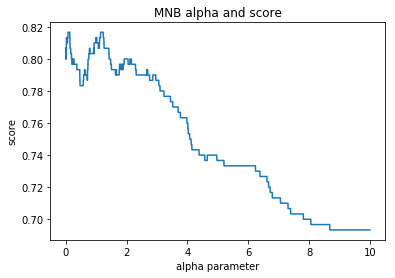

max score: 0.8333333333333334
parameter: 0.076


In [225]:
import matplotlib.pyplot as plt

alpha_parameters = [x*0.001 for x in range(1, 10000, 1)]
a_scores = []
max_score_a = 0
max_alpha = 0

for i in range(len(alpha_parameters)):
    
    alpha_para = alpha_parameters[i]
    
    model = MultinomialNB(alpha = alpha_para)
    
    model.fit(training_data, y_train)
    
    score = model.score(development_data, y_dev)
    
    a_scores.append(score)
    
    if score > max_score_a:
        max_score_a = score
        max_alpha = alpha_parameters[i]
    
plt.plot(alpha_parameters, a_scores)
plt.xlabel("alpha parameter")
plt.ylabel("score")
plt.title("MNB alpha and score")
plt.show()

print("max score: " + str(max_score))
print("parameter: " + str(max_alpha))

/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


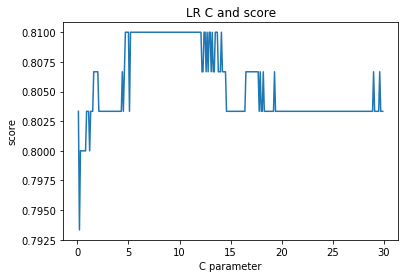

max score: 0.81
parameter: 4.7


In [226]:
C_parameters = [x*0.1 for x in range(1, 300, 1)]
C_scores = []
max_score_C = 0
max_C = 0

for i in range(len(C_parameters)):
    
    C_para = C_parameters[i]
    
    model = LogisticRegression(C = C_para)
    
    model.fit(training_data, y_train)
    
    score = model.score(development_data, y_dev)
    
    C_scores.append(score)
    
    if score > max_score_C:
        max_score_C = score
        max_C = C_parameters[i]
    
plt.plot(C_parameters, C_scores)
plt.xlabel("C parameter")
plt.ylabel("score")
plt.title("LR C and score")
plt.show()

print("max score: " + str(max_score_C))
print("parameter: " + str(max_C))

**Grid Search**

In [227]:
from sklearn.model_selection import GridSearchCV

MNB_parameters = {"alpha":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

MNB_grid = GridSearchCV(estimator = MultinomialNB(), param_grid = MNB_parameters)
MNB_grid_result = MNB_grid.fit(development_data, y_dev)

print('Best Score: ', MNB_grid_result.best_score_)
print('Best Paramaters: ', MNB_grid_result.best_params_)

Best Score:  0.7433333333333333
Best Paramaters:  {'alpha': 0.0001}


/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [228]:
LR_parameters = {"penalty": ['l1', 'l2'], "C": [x for x in range(1, 50)]}

LR_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = LR_parameters)
LR_grid_result = LR_grid.fit(development_data, y_dev)

print('Best Score: ', LR_grid_result.best_score_)
print('Best Paramaters: ', LR_grid_result.best_params_)

/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best Score:  0.7166666666666667
Best Paramaters:  {'C': 1, 'penalty': 'l2'}


/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Question 7 (1.0 mark)

**Instructions**: Using the best settings you have found, compare the two classifiers based on performance in the test set. Print out both accuracy and macro-averaged F-score for each classifier. Be sure to label your output.

**Task**: Compute test performance in terms of accuracy and macro-averaged F-score for both Naive Bayes and Logistic Regression, using optimal hyper-parameter settings.

In [229]:
###
# Your answer BEGINS HERE
###
from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score, classification_report
    
clfs = [MultinomialNB(alpha = max_alpha), LogisticRegression(C = max_C)]
for clf in clfs:
    y_predictions = model_selection.cross_val_predict(clf, test_data, y_test, cv=10)
    print(clf)
    print("accuracy:")
    print(accuracy_score( y_test, y_predictions))
    print("F-score:")
    print(f1_score( y_test, y_predictions, average='macro'))
    print("Report:")
    print(classification_report( y_test, y_predictions))
    print("\n")

/Users/iphoneoppa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


MultinomialNB(alpha=0.076, class_prior=None, fit_prior=True)
accuracy:
0.7633333333333333
F-score:
0.7357024977975208
Report:
              precision    recall  f1-score   support

    nonrumor       0.83      0.81      0.82       200
       rumor       0.64      0.66      0.65       100

   micro avg       0.76      0.76      0.76       300
   macro avg       0.73      0.74      0.74       300
weighted avg       0.77      0.76      0.76       300



LogisticRegression(C=4.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
accuracy:
0.7133333333333334
F-score:
0.6470588235294117
Report:
              precision    recall  f1-score   support

    nonrumor       0.75      0.86      0.80       200
       rumor       0.60      0.42      0.49       100

   micro avg       0.71      0.71      0.71       30